## 第２問

### (3)

減衰振動$\frac{t_s}{t_d} = 0.5, 1$、臨界減衰$\frac{t_s}{t_d} = 2$、過減衰$\frac{t_s}{t_d} = 3, 5$である。また、シミュレーション結果を点で表し、微分方程式を解析に解いた解を線で表した。シミュレーションでは時間は$\Delta t = 1.0 /times 10 ^ -4$の間隔で計算した。左は無次元化された位置であり、右は無次元化された速度である。シミュレーションはdamp.cppを用いて行った。

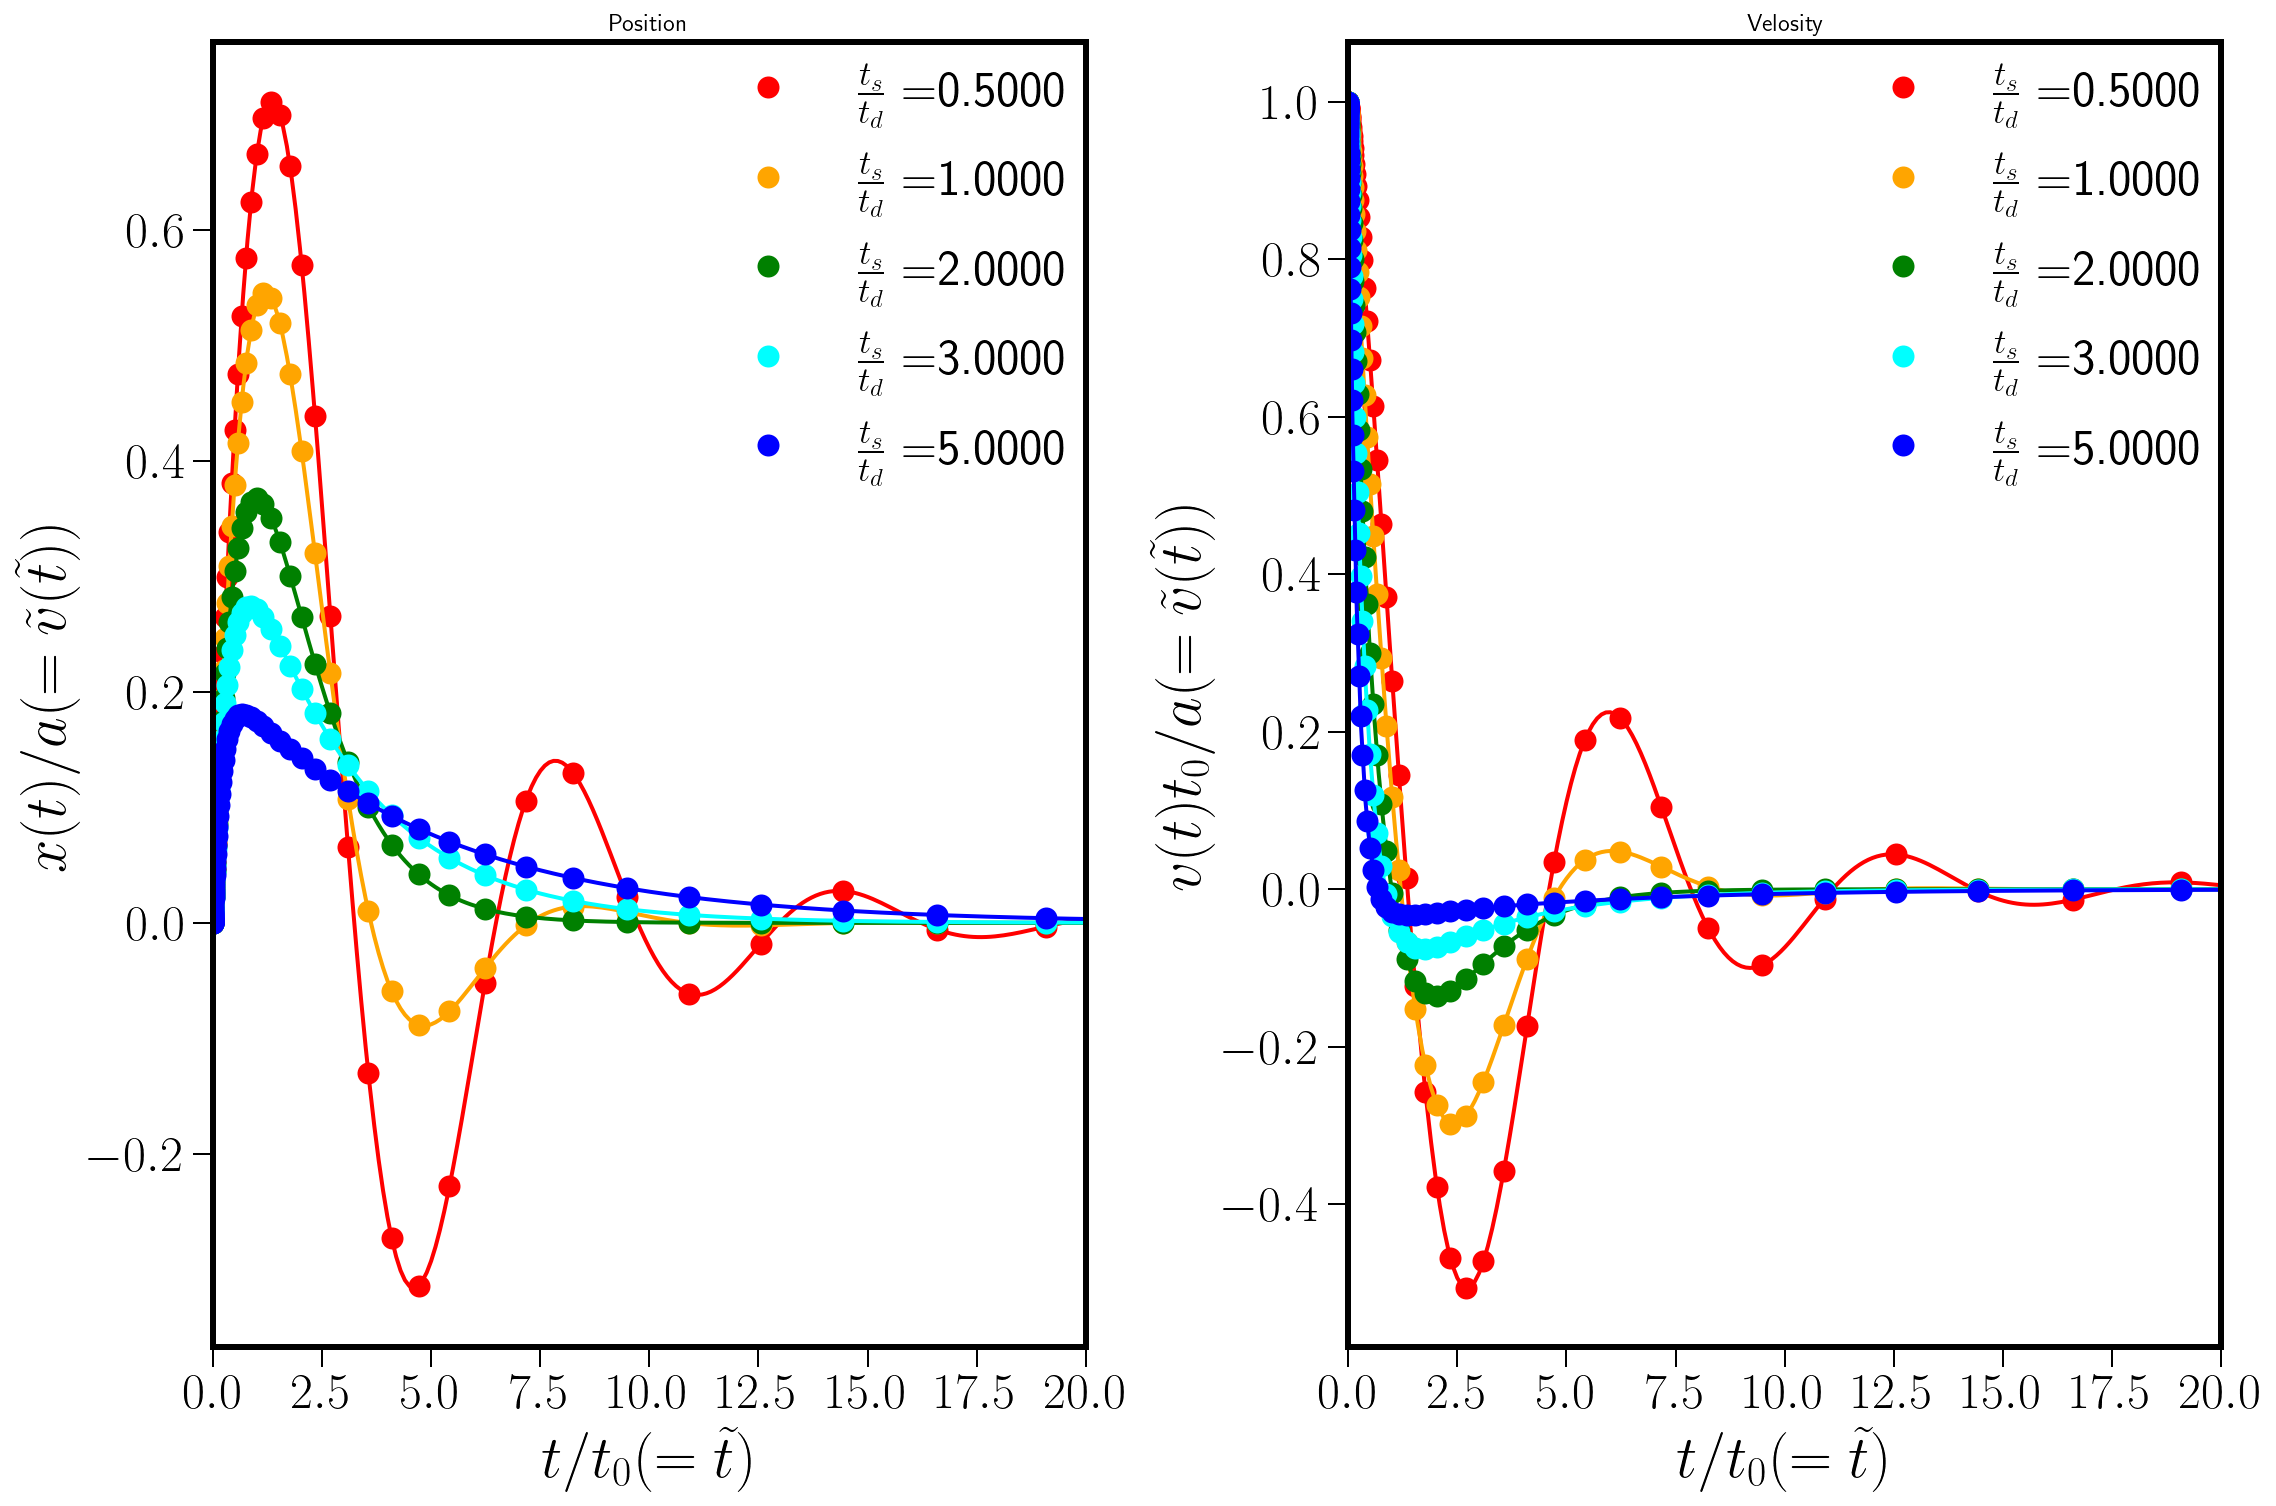

In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#図の解像度が上がる
%config InlineBackend.figure_format = 'retina'
import numpy as np
#Tex フォント
plt.rcParams["text.usetex"] =True 
#図全体のサイズやアスペクト比を変える
fig = plt.figure(figsize=(18,12))
#複数の図を並べる時ここを変える

tstds = ((0.5, "r"), (1.0, "orange"), (2.0, "g"), (3.0, "cyan"), (5.0, "b"))
#tstds = ((1.0, "r"), (2.0, "g"), (5.0, "b"))


def vibration_x(t, tstd):
    if tstd < 2:
        return 1/np.sqrt(1-1/4*tstd**2)*np.exp(-t/2*tstd)*np.sin(np.sqrt(1-1/4*tstd**2)*t)
    elif tstd > 2:
        return 1/2*1/np.sqrt(1/4*tstd**2-1)*np.exp(-t/2*tstd)*(np.exp(np.sqrt(1/4*tstd**2-1)*t)-np.exp(-np.sqrt(1/4*tstd**2-1)*t))

    else:
        return t*np.exp(-t)

def vibration_v(t, tstd):
    if tstd < 2:
        return np.exp(-t/2*tstd)*(np.cos(np.sqrt(1-1/4*tstd**2)*t)-1/np.sqrt(4*1/tstd**2-1)*np.sin(np.sqrt(1-1/4*tstd**2)*t))
    elif tstd > 2:
        return 1/2*np.exp(-t/2*tstd)*(np.exp(np.sqrt(1/4*tstd**2 - 1)*t)*(1-1/np.sqrt(1 - 4*1/tstd**2))+np.exp(-np.sqrt(1/4*tstd**2 - 1)*t)*(1+1/np.sqrt(1 - 4*1/tstd**2)))

    else:
        return (1-t)*np.exp(-t)
 ###########################
plt.subplot(121)
ax1 = fig.gca()

for tstd, c in tstds:
    t, x, v  = np.loadtxt(f"./damp_dt0.0001_tstd{tstd:.4f}.dat", comments='#', unpack=True)
    plt.plot(t, x, "o",markersize=10,color=c,label=r"$\frac{t_s}{t_d}=$" + f"{tstd:.4f}")

    ###Drawing a line ######
    t = np.linspace(0, 100, 1000) 

    x = vibration_x(t, tstd)
    plt.plot(t, x, "-",markersize=3,linewidth = 2.0, color=c)
    #########

#図の書式設定
#plt.xscale('log')
plt.title("Position")
plt.xlim(0, 20)
plt.tick_params(which='major',width = 1, length = 10)
plt.tick_params(which='minor',width = 1, length = 5)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
plt.xlabel(r"$t/t_0(= \tilde{t})$",color='k', size=30)
plt.ylabel(r"$x(t)/a(= \tilde{v}(\tilde{t}))$",color='k', size=30)
plt.xticks(color='k', size=25)
plt.yticks(color='k', size=25)
#図の凡例の有無や位置，サイズを調整
plt.legend(ncol=1, loc=1, borderaxespad=0, fontsize=25,frameon=False)
#各グラフのアスペクト比を1:1にする
#################################

 ###########################
plt.subplot(122)
ax2 = plt.gca()

for tstd, c in tstds:
    t, x, v  = np.loadtxt(f"./damp_dt0.0001_tstd{tstd:.4f}.dat", comments='#', unpack=True)
    plt.plot(t, v, "o",markersize=10,color=c,label=r"$\frac{t_s}{t_d}=$" + f"{tstd:.4f}")

    ###Drawing a line ######
    t = np.linspace(0, 100, 1000) 

    v = vibration_v(t, tstd)
    plt.plot(t, v, "-",markersize=3,linewidth = 2.0, color=c)
    #########

#図の書式設定
plt.title("Velosity")
plt.xlim(0, 20)
plt.tick_params(which='major',width = 1, length = 10)
plt.tick_params(which='minor',width = 1, length = 5)
ax2.spines['top'].set_linewidth(3)
ax2.spines['bottom'].set_linewidth(3)
ax2.spines['left'].set_linewidth(3)
ax2.spines['right'].set_linewidth(3)
plt.xlabel(r"$t/t_0(= \tilde{t})$",color='k', size=30)
plt.ylabel(r"$v(t)t_0/a(= \tilde{v}(\tilde{t}))$",color='k', size=30)
plt.xticks(color='k', size=25)
plt.yticks(color='k', size=25)
#図の凡例の有無や位置，サイズを調整
plt.legend(ncol=1, loc=1, borderaxespad=0, fontsize=25,frameon=False)
#################################

#図のマージン設定
plt.subplots_adjust(wspace=0.3, hspace=0.25)

#各自ファイルのパスを変えること．
plt.savefig('./damp.png')
plt.savefig('./damp.pdf')

理論曲線とよく一致している。収束の具合を見るために、それぞれ絶対値を取って対数でプロットした。

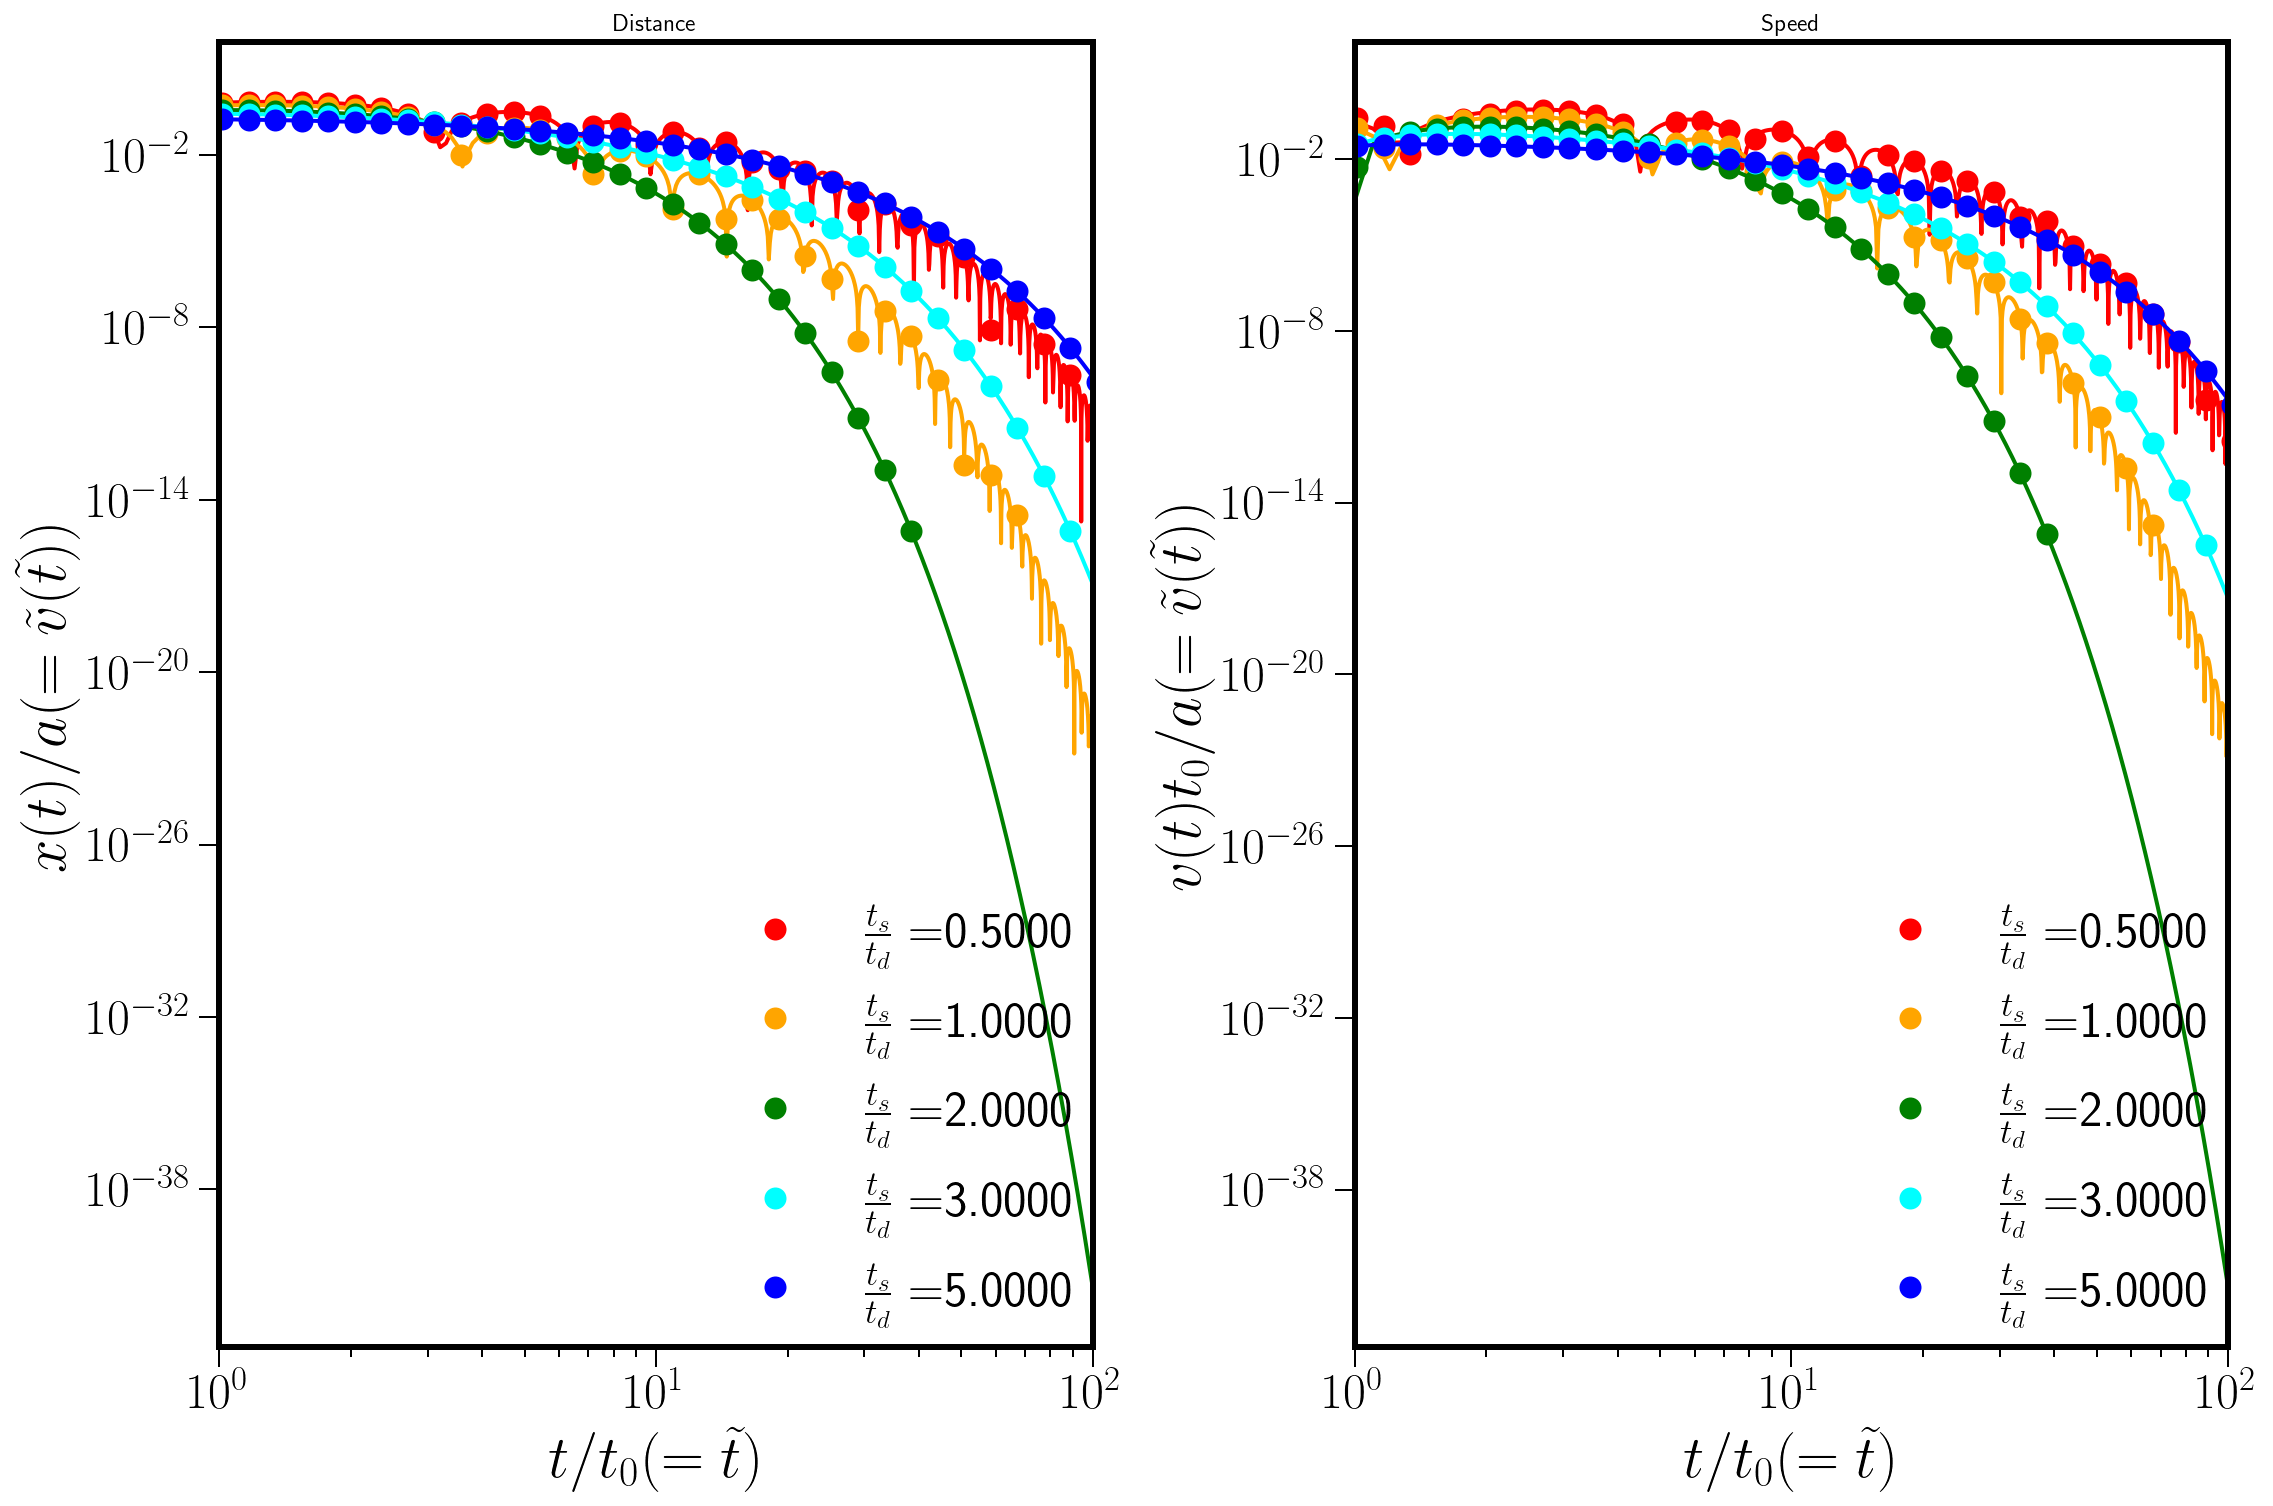

In [8]:
fig = plt.figure(figsize=(18,12))
#複数の図を並べる時ここを変える

def vibration_x(t, tstd):
    if tstd < 2:
        return 1/np.sqrt(1-1/4*tstd**2)*np.exp(-t/2*tstd)*np.sin(np.sqrt(1-1/4*tstd**2)*t)
    elif tstd > 2:
        return 1/2*1/np.sqrt(1/4*tstd**2-1)*np.exp(-t/2*tstd)*(np.exp(np.sqrt(1/4*tstd**2-1)*t)-np.exp(-np.sqrt(1/4*tstd**2-1)*t))

    else:
        return t*np.exp(-t)

def vibration_v(t, tstd):
    if tstd < 2:
        return np.exp(-t/2*tstd)*(np.cos(np.sqrt(1-1/4*tstd**2)*t)-1/np.sqrt(4*1/tstd-1)*np.sin(np.sqrt(1-1/4*tstd**2)*t))
    elif tstd > 2:
        return 1/2*np.exp(-t/2*tstd)*(np.exp(np.sqrt(1/4*tstd**2 - 1)*t)*(1-1/np.sqrt(1 - 4*1/tstd**2))+np.exp(-np.sqrt(1/4*tstd**2 - 1)*t)*(1+1/np.sqrt(1 - 4*1/tstd**2)))

    else:
        return (1-t)*np.exp(-t)
 ###########################
plt.subplot(121)
ax1 = fig.gca()

for tstd, c in tstds:
    t, x, v  = np.loadtxt(f"./damp_dt0.0001_tstd{tstd:.4f}.dat", comments='#', unpack=True)
    plt.plot(t, np.abs(x), "o",markersize=10,color=c,label=r"$\frac{t_s}{t_d}=$" + f"{tstd:.4f}")

    ###Drawing a line ######
    t = np.linspace(0, 100, 1000) 

    x = vibration_x(t, tstd)
    plt.plot(t, np.abs(x), "-",markersize=3,linewidth = 2.0, color=c)
    #########

plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 100)

#図の書式設定
plt.title("Distance")
plt.tick_params(which='major',width = 1, length = 10)
plt.tick_params(which='minor',width = 1, length = 5)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
plt.xlabel(r"$t/t_0(= \tilde{t})$",color='k', size=30)
plt.ylabel(r"$x(t)/a(= \tilde{v}(\tilde{t}))$",color='k', size=30)
plt.xticks(color='k', size=25)
plt.yticks(color='k', size=25)
#図の凡例の有無や位置，サイズを調整
plt.legend(ncol=1, loc=4, borderaxespad=0, fontsize=25,frameon=False)
#各グラフのアスペクト比を1:1にする
#################################

 ###########################
plt.subplot(122)
ax2 = plt.gca()

for tstd, c in tstds:
    t, x, v  = np.loadtxt(f"./damp_dt0.0001_tstd{tstd:.4f}.dat", comments='#', unpack=True)
    plt.plot(t, np.abs(v), "o",markersize=10,color=c,label=r"$\frac{t_s}{t_d}=$" + f"{tstd:.4f}")

    ###Drawing a line ######
    t = np.linspace(0, 100, 1000) 

    v = vibration_v(t, tstd)
    plt.plot(t, np.abs(v), "-",markersize=3,linewidth = 2.0, color=c)
    #########

#図の書式設定
plt.title("Speed")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 100)
plt.tick_params(which='major',width = 1, length = 10)
plt.tick_params(which='minor',width = 1, length = 5)
ax2.spines['top'].set_linewidth(3)
ax2.spines['bottom'].set_linewidth(3)
ax2.spines['left'].set_linewidth(3)
ax2.spines['right'].set_linewidth(3)
plt.xlabel(r"$t/t_0(= \tilde{t})$",color='k', size=30)
plt.ylabel(r"$v(t)t_0/a(= \tilde{v}(\tilde{t}))$",color='k', size=30)
plt.xticks(color='k', size=25)
plt.yticks(color='k', size=25)
#図の凡例の有無や位置，サイズを調整
plt.legend(ncol=1, loc=4, borderaxespad=0, fontsize=25,frameon=False)
#################################

#図のマージン設定
plt.subplots_adjust(wspace=0.3, hspace=0.25)

#各自ファイルのパスを変えること．
plt.savefig('./damp_log.png')
plt.savefig('./damp_log.pdf')

臨界減衰が最も速く収束している。また臨界減衰以外では、臨界減衰に近い方が収束が速い。

In [ ]:
import sympy as np

tstd, t = np.symbols("tstd t")
x = 1/2*1/np.sqrt(1/4*tstd**2-1)*np.exp(-t/2*tstd)*(np.exp(np.sqrt(1/4*tstd**2-1)*t)-np.exp(-np.sqrt(1/4*tstd**2-1)*t))
v = 